# Modeling Microbial Growth
## NCSSM Mini-term Feb. 2018
### Prepared by Cullen J.N. Roth | Magwene Lab 

# 1. Load modules and write functions for analysis of growth

## 1.1 Import needed modules

In [1]:
import numpy as np ## Numpy is a useful family of functions in python for basic analysis
import pandas as pd ## Pandas is a groupof functions for loading in files and manipulate dataframes
from matplotlib import pyplot as plt ## Matplotib allows us to make pretty figures
from scipy.optimize import curve_fit ## The curve fit ftn allows us to fit curves

###### This line of code below allows us to plot within the notebook

In [2]:
%matplotlib inline

## 1.2 Functions for analysis of microbial growth curves.
### Here we will define the growth models used in our analysis. These were taken from Zwietering et al 1990 (see table 2). Below we have defined the functions in terms of the growing capacity (A), the maximum growth rate (u) and the lag time (l). 

In [3]:
def logistic(t,A,u,l):
    """Logistic growth equation"""
    y = A/(1+np.exp(((4*u/A)*(l - t)) + 2))
    return y

def gompertz(t,A,u,l):
    """Gompertz growth equation"""
    y = A * np.exp(-np.exp(((u*np.exp(1)/A)*(l-t))+1))
    return y

def log_linear(x, a, b):
    """Linear logistic regression"""
    y = np.exp(a + (b*x));
    return y

def r_squared(y,y_approx):
    """Calculates the coefficent of determination"""
    residuals = y - y_approx;
    ss_res = np.sum(residuals**2);
    ss_tot = np.sum((y-np.mean(y))**2);
    return 1.0 - (ss_res / ss_tot)

### 1.2.1
##### Above, I've included the gompertz function, yet there are a few other growth models in Zwietering et al 1990. Can you write your own grwoth model function or one of those included in Zwietering et al 1990?

# 2. Setting variables and parameters

#### For the gompertz growth model below we will display the results and curves for various growth paramaters.

## 2.1 Generate an array of time values 
#### Growth data is usually collected as some function of time. Don't forget units may matter! Here we are defining an array of time points in hours.

In [4]:
time = np.arange(0,42); ## What does np.arange do?
print time[:5] ## Print the first 5 time points
print len(time) ## make sure there are 42 values (hours)

[0 1 2 3 4]
42


### 2.1.1
##### How could we change the code above to get 72 (hours) time points?
### 2.1.2
##### How could we change the code above to convert the units of our time points from hours to minutes?

## 2.2 Set parameters of growth model

#### Recall that our growth models need three parameters, A, u and l. 
### 2.2.1
##### What do these parameters, A, u, and l represent?

In [5]:
A = [0.25, 0.5, 0.75] ## Set 3 different values for the carrying capacity
u = [0.01, 0.05, 0.09] ## ... the max growth rate
l = [20, 10, 5.0] ## ... and the lag (in hours)

###### If we changed our units of time above from hours (to say minutes) be sure to change the units of lag. 

# 3. Calculate values from Growth (Gompertz) model

#### Below we will feed into the gompertz growth function our values of A, u, l above. 

## 3.1 Calling the growth function

In [6]:
Y1 = gompertz(time,A[0],u[0],l[0]); ## Here we feed into our gompertz function the values of A, u, and l.
Y2 = gompertz(time,A[1],u[1],l[1]);
Y3 = gompertz(time,A[2],u[2],l[2]); ## What do these values return to you?

### 3.1.1
##### For our other growth models how would we call them as we did above for the gompertz growth functions?

## 3.2 Display our Gompertz growth curves

### Make some figures! 

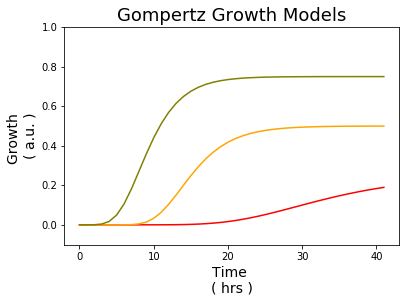

In [7]:
plt.plot(time,Y1,'red'); ## Plot models
plt.plot(time,Y2,'orange');
plt.plot(time,Y3,'olive');
plt.ylim(-0.1,1); ## Set y limits
plt.title('Gompertz Growth Models',fontsize=18); ## add title and labels
plt.xlabel('Time \n( hrs )',fontsize=14);
plt.ylabel('Growth \n( a.u. )',fontsize=14);

### You can set your own parameters for growth equations in the cells above. 
### Play around with these models and parameters and make various figures. 
### 3.2.1
##### What happens when we have longer or shorter lag times but the same values for A (carrygin capacity) and u (max growth rate)? 
### 3.2.2
##### What happens when we have faster growth rates but similar l (lag) and A (carrying capacity)? 
### 3.2.3
##### If A, the carrying capacity, is large, is it possible to reach this value if we have only have 48 hours?
### 3.2.4
##### What do these curves look like for the logistic equation and log-linear regression, with and without similar values for A, u, and l?

# 4 Data Importation & Manipulation

## 4.1 Bring in the data with pandas

### Here we are bringing in "test_data" from a previous class.
### pandas takes in a path to the data as input (You will need to download this data). You may need to change this path for your computer

In [8]:
plate = pd.read_excel('test_data.xlsx',skiprows=1) 

## 4.2 See first few (5) rows of data

### Use the pandas function .head() to see the first 5 rows of data

In [9]:
plate.head()

,(hrs),test1,test2,test3,test4,test5,test6,test7,test8,test9
0,0.0,0.119,0.238,0.476,0.952,1.904,3.808,7.616,15.232,30.464
1,0.5,0.119,0.238,0.476,0.952,1.904,3.808,7.616,15.232,30.464
2,1.0,0.124,0.248,0.496,0.992,1.984,3.968,7.936,15.872,31.744
3,1.5,0.125,0.250,0.500,1.000,2.000,4.000,8.000,16.000,32.000
4,2.0,0.127,0.254,0.508,1.016,2.032,4.064,8.128,16.256,32.512


## 4.3 Transpose functions
#### Much like the .head() function, other functions on pandas dataframes such as the transpose (.T) can be used

In [10]:
plate.T

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
(hrs),0.000,0.500,1.000,1.500,2.000,2.500,3.000,3.500,4.000,4.500,...,67.500,68.0,68.500,69.000,69.500,70.000,70.500,71.000,71.50,72.000
test1,0.119,0.119,0.124,0.125,0.127,0.129,0.131,0.133,0.136,0.139,...,0.397,0.4,0.402,0.403,0.405,0.407,0.408,0.409,0.41,0.413
test2,0.238,0.238,0.248,0.250,0.254,0.258,0.262,0.266,0.272,0.278,...,0.794,0.8,0.804,0.806,0.810,0.814,0.816,0.818,0.82,0.826
test3,0.476,0.476,0.496,0.500,0.508,0.516,0.524,0.532,0.544,0.556,...,1.588,1.6,1.608,1.612,1.620,1.628,1.632,1.636,1.64,1.652
test4,0.952,0.952,0.992,1.000,1.016,1.032,1.048,1.064,1.088,1.112,...,3.176,3.2,3.216,3.224,3.240,3.256,3.264,3.272,3.28,3.304
test5,1.904,1.904,1.984,2.000,2.032,2.064,2.096,2.128,2.176,2.224,...,6.352,6.4,6.432,6.448,6.480,6.512,6.528,6.544,6.56,6.608
test6,3.808,3.808,3.968,4.000,4.064,4.128,4.192,4.256,4.352,4.448,...,12.704,12.8,12.864,12.896,12.960,13.024,13.056,13.088,13.12,13.216
test7,7.616,7.616,7.936,8.000,8.128,8.256,8.384,8.512,8.704,8.896,...,25.408,25.6,25.728,25.792,25.920,26.048,26.112,26.176,26.24,26.432
test8,15.232,15.232,15.872,16.000,16.256,16.512,16.768,17.024,17.408,17.792,...,50.816,51.2,51.456,51.584,51.840,52.096,52.224,52.352,52.48,52.864
test9,30.464,30.464,31.744,32.000,32.512,33.024,33.536,34.048,34.816,35.584,...,101.632,102.4,102.912,103.168,103.680,104.192,104.448,104.704,104.96,105.728


### 4.3.1
##### What column (or row) in the dataframe above contains the time points, what units are these time points in, and how many are there?
### 4.3.2
##### What information does the function len() give you? Try typing in ?len() in a cell
### 4.3.3
##### Using the len() or .shape() functions how many test samples (not time points) are in the data?

# 5 Analysis of test data

## 5.1 Baseline data
### The first time point is often subtracted to account for the differences in the initial inoculation. We can correct for the initial culture size by subtracting this value.

In [11]:
sample = 'test1' ## Set the sample for analysis
ydata = plate[sample].values ## Take the sample values out of the dataframe and convert to an array
ydata = ydata - ydata[0] ## Subtract the initial values 
xdata = plate['(hrs)'].values ## Collect time points

## 5.2 Utilize the curve_fit function to fit growth models to our data

### 5.2.1
##### What does curve_fit do (you can check by typing in ?curve_fit in a cell)?

#### The function curve_fit is not perfect. It can have trouble dealing with small values like ours. To avoid overflow errors we can scale our values between zero and one by normilizing via the maximum and re-scaling our parameters after fitting curves.

In [12]:
scale = max(ydata) ## Collect the max y-value for this sample
popt_gom, pcov_gom = curve_fit(gompertz, xdata, ydata/scale); ## Here we are deviding the y-values by the maximum
popt_gom[:2] = popt_gom[:2] * scale ## We need to rescale the carrying capacity and maximum growth rate (but not lag)
print popt_gom

[ 0.25038251  0.01411622  4.27894425]


## 5.3 Calculate the approximation from our curve fitting

In [13]:
yhat_gom = gompertz(xdata,*popt_gom) ## here we are putting into gompertz the values from popt_gom

### 5.3.1
##### What does the "*" symbol do to the variable popt_gom?

## 5.4 Calculate the coefficient of determenation

In [14]:
print "R2 Gompertz:", round(r_squared(ydata,yhat_gom),3)

R2 Gompertz: 0.966


## 5.5 Plot our data and fit

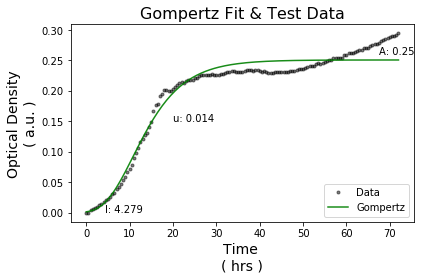

In [15]:
plt.plot(xdata, ydata, '.k', label='Data',alpha=.5); ## Plot sample data
plt.plot(xdata, yhat_gom,'-g', label='Gompertz',alpha=.9); ## Plot growth model
plt.annotate("u: " + str(round(popt_gom[1],3)),(20,.15)); ## Add in text with the calculated parameters (u)
plt.annotate("A: " + str(round(popt_gom[0],3)),(xdata[-10],popt_gom[0]+.01)); ## ... for A
plt.annotate("l: " + str(round(popt_gom[-1],3)),(popt_gom[-1],0)); ## ... for l 
plt.ylabel('Optical Density\n( a.u. )',fontsize=14); ## Add titles, legends, and labels 
plt.xlabel('Time \n( hrs )',fontsize=14); ## Add x axis label
plt.title('Gompertz Fit & Test Data',fontsize=16); ## Add y axis label
plt.legend(loc='lower right'); ## Place the legend in lower right corner
plt.tight_layout(); ## This makes everything pretty
plt.savefig('Fit_to_growth.jpeg'); ## This will save the figure

### 5.5.1
##### What about the other samples in the data set; can you run our analysis and plot more than one sample on a figure or sub-figures? 
Hint: check out plt.subplots()
### 5.5.2
##### Explore the other models introduced in class and written above, for a given sample do we see differences in the estimated parameters from different models?
### 5.5.3
##### From the question above, for a given sample, plot on the same figure the gompertz and logistic growth models.